<a href="https://colab.research.google.com/github/Uzmamushtaque/Projects-in-Machine-Learning-and-AI/blob/main/ChurnPredictionKaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df=pd.read_csv('train.csv')

In [34]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [35]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

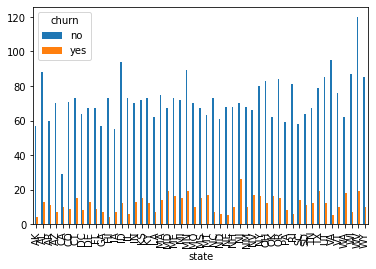

In [37]:
df = df.astype({"state": str, "churn": str})

df1=df.groupby(['state','churn']).size()
df1=df1.unstack()
df1.plot(kind='bar')
figsize=(100,500)
plt.show()

In [38]:
print(sum(df1['no']))
print(sum(df1['yes']))

3652
598


In [39]:
df['total_net_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
df['total_net_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
df['total_net_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']


df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0}) 
df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0}) 

df.drop(columns= ['state', 'area_code'], inplace= True)
#df.area_code = pd.Categorical(df.area_code).codes
df['churn'] = df['churn'].map({'yes': 1, 'no': 0}) 


df.drop(columns=['total_day_charge', 'total_eve_charge','total_night_charge',
                'total_day_calls','total_eve_calls', 'total_night_calls', 'total_day_minutes', 
                  'total_eve_minutes', 'total_night_minutes'], inplace=True)

In [40]:
df.tail()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_net_minutes,total_net_calls,total_net_charge
4245,83,0,0,0,10.3,6,2.78,0,0,645.8,237,62.35
4246,73,0,0,0,11.5,6,3.11,3,0,495.3,260,49.77
4247,75,0,0,0,6.9,7,1.86,1,0,492.9,331,51.24
4248,50,0,1,40,9.9,5,2.67,2,0,756.2,369,72.42
4249,86,0,1,34,9.3,16,2.51,0,0,551.3,306,51.67


The dataset is imbalanced therefore we need to perform some oversampling on the minority class.

In [41]:
def prepare_model_smote(df,class_col,cols_to_exclude):
#Synthetic Minority Oversampling Technique. Generates new instances from existing minority cases that you supply as input. 
  from sklearn.model_selection import train_test_split
  import numpy as np
  from imblearn.over_sampling import SMOTE
  cols=df.select_dtypes(include=np.number).columns.tolist() 
  X=df[cols]
  X = X[X.columns.difference([class_col])]
  X = X[X.columns.difference(cols_to_exclude)]
  y=df[class_col]
  global X_train, X_test, y_train, y_test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
  sm = SMOTE(random_state=0, sampling_strategy=1.0)
  X_train, y_train = sm.fit_resample(X_train, y_train)

In [42]:
df = df.dropna() # cleaning up null values

In [43]:
prepare_model_smote(df,class_col = 'churn',cols_to_exclude=['state', 'area_code'])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4250 entries, 0 to 4249
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   int64  
 1   international_plan             4250 non-null   int64  
 2   voice_mail_plan                4250 non-null   int64  
 3   number_vmail_messages          4250 non-null   int64  
 4   total_intl_minutes             4250 non-null   float64
 5   total_intl_calls               4250 non-null   int64  
 6   total_intl_charge              4250 non-null   float64
 7   number_customer_service_calls  4250 non-null   int64  
 8   churn                          4250 non-null   int64  
 9   total_net_minutes              4250 non-null   float64
 10  total_net_calls                4250 non-null   int64  
 11  total_net_charge               4250 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 431.6 KB


In [51]:
def run_model(X_train,X_test,y_train,y_test):
  from sklearn.linear_model import LogisticRegression
  from sklearn.metrics import roc_auc_score,classification_report
  global logreg #Defines the logistic model as a global model that can be used outside of this function
  ##Fitting the logistic regression
  logreg = LogisticRegression(max_iter=500,random_state = 13)
  logreg.fit(X_train, y_train)
  ##Predicting y values
  global y_pred #Defines the Y_Pred as a global variable that can be used outside of this function
  y_pred = logreg.predict(X_test)
  logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
  print(classification_report(y_test, y_pred))
  print("The area under the curve is: %0.2f"%logit_roc_auc)

In [52]:
# run the logistics regression model and evaluate the results
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.95      0.71      0.82      1102
           1       0.30      0.77      0.43       173

    accuracy                           0.72      1275
   macro avg       0.62      0.74      0.62      1275
weighted avg       0.86      0.72      0.76      1275

The area under the curve is: 0.74


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
